# WALMART SALES PROJECT

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [8]:
# Load dataset
data = pd.read_csv(r'\Users\DELL\Downloads\Walmart_Sales 5.csv')

In [10]:
# Preview data
print(data.head())

   Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  05-03-2010    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106  


In [18]:
print(data['Date'].head())

0    05-02-2010
1    12-02-2010
2    19-02-2010
3    26-02-2010
4    05-03-2010
Name: Date, dtype: object


In [20]:
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

In [22]:
print("Number of invalid dates:", data['Date'].isna().sum())

Number of invalid dates: 3870


In [24]:
data = data.dropna(subset=['Date'])

In [26]:
data['Date'] = data['Date'].dt.strftime('%m-%d-%Y')

In [28]:
# Convert 'Date' to datetime format first
data['Date'] = pd.to_datetime(data['Date'])


In [30]:
# Sort by Store and Date
data = data.sort_values(by=['Store', 'Date']).reset_index(drop=True)

In [32]:
# Convert date to MM-DD-YYYY format
data['Date'] = data['Date'].dt.strftime('%m-%d-%Y')


In [34]:
# Check for missing values
print(data.isnull().sum())


Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64


In [38]:
data['Weekly_Sales'] = data['Weekly_Sales'].round(2)

In [40]:
data['Temperature'] = data['Temperature'].round(0)

In [42]:
data['Fuel_Price'] = data['Fuel_Price'].round(2)

In [44]:
data['CPI'] = data['CPI'].round(3)

In [46]:
data['Unemployment'] = data['Unemployment'].round(3)

In [48]:
data[['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']].head()

,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment
0,1453329.50,72.0,2.60,211.672,7.838
1,1594968.28,62.0,2.72,210.820,7.808
2,1492418.14,81.0,2.67,211.224,7.787
3,1540163.53,81.0,2.58,211.531,7.787
4,1548033.78,49.0,2.71,211.607,7.838


# Q1: Holidays that affect weekly sales the most

In [51]:
# Filter holiday weeks
holiday_sales = data[data['Holiday_Flag'] == 1]


In [53]:
# Group by holiday date
holiday_group = holiday_sales.groupby('Date')['Weekly_Sales'].sum().sort_values(ascending=False)


In [55]:
print(holiday_group.head())


Date
10-02-2012    50009407.92
12-02-2010    48336677.63
07-09-2012    48330059.31
11-02-2011    47336192.79
09-09-2011    46763227.53
Name: Weekly_Sales, dtype: float64


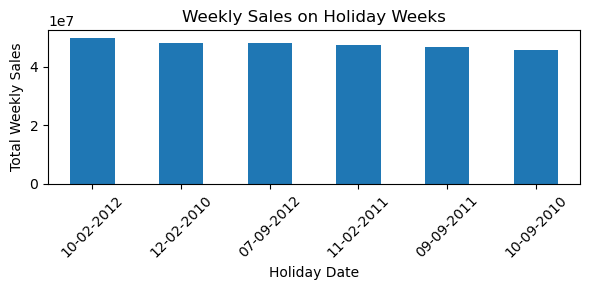

In [59]:
# Plot
holiday_group.plot(kind='bar', title='Weekly Sales on Holiday Weeks', figsize=(6,3))
plt.ylabel('Total Weekly Sales')
plt.xlabel('Holiday Date')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Q2: Lowest and highest unemployment rate by store

In [64]:
# Group by store and get min/max unemployment
unemp_stats = data.groupby('Store')['Unemployment'].agg(['min', 'max'])


In [66]:
lowest_unemp = unemp_stats['min'].idxmin()
highest_unemp = unemp_stats['max'].idxmax()


In [68]:
print(f"Lowest unemployment rate: Store {lowest_unemp}")

Lowest unemployment rate: Store 4


In [70]:
print(f"Highest unemployment rate: Store {highest_unemp}")

Highest unemployment rate: Store 12


# Q3: Correlation between CPI and Weekly Sales

In [73]:
# Overall
corr_all = data['CPI'].corr(data['Weekly_Sales'])


In [75]:
# Holidays
corr_holiday = data[data['Holiday_Flag'] == 1]['CPI'].corr(data[data['Holiday_Flag'] == 1]['Weekly_Sales'])


In [77]:
# Non-Holidays
corr_non_holiday = data[data['Holiday_Flag'] == 0]['CPI'].corr(data[data['Holiday_Flag'] == 0]['Weekly_Sales'])


In [79]:
print(f"Overall Correlation: {corr_all:.3f}")
print(f"Holiday Correlation: {corr_holiday:.3f}")
print(f"Non-Holiday Correlation: {corr_non_holiday:.3f}")

Overall Correlation: -0.078
Holiday Correlation: -0.094
Non-Holiday Correlation: -0.076


# Q4: Fuel Price impact analysis

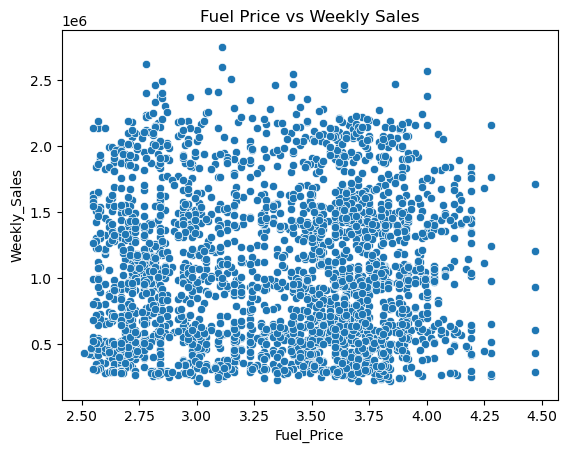

In [82]:
# Scatter plot with Weekly Sales
sns.scatterplot(data=data, x='Fuel_Price', y='Weekly_Sales')
plt.title('Fuel Price vs Weekly Sales')
plt.show()

In [84]:
# Correlation
fuel_corr = data['Fuel_Price'].corr(data['Weekly_Sales'])
print(f"Correlation between Fuel Price and Weekly Sales: {fuel_corr:.3f}")

Correlation between Fuel Price and Weekly Sales: 0.028


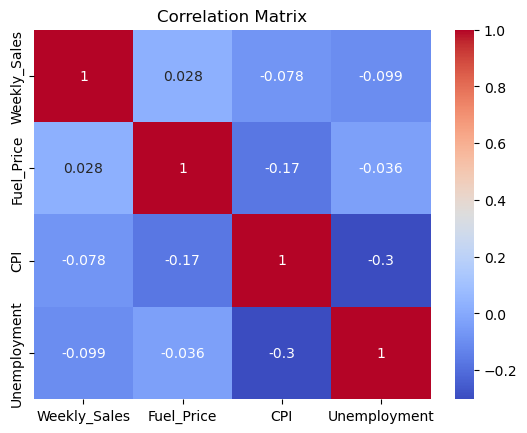

In [86]:
# Correlation matrix
corr_matrix = data[['Weekly_Sales', 'Fuel_Price', 'CPI', 'Unemployment']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
data.to_csv('Cleaned_Walmart_Sales.csv', index=False)
